In [1]:
import trig_poly
import dual_certificates
import test_data
import numpy as np
import plt_util
import phase_transition
from matplotlib import pyplot as plt

%matplotlib inline

In [27]:
reload(test_data)
reload(dual_certificates)
reload(trig_poly)

N = 40
m = 4
fc = 50
min_separation = 0.95 / fc

kernel = trig_poly.TrigPoly.dirichlet(fc)

support = test_data.jittered_supports(N, min_separation=min_separation)
sign_pattern = test_data.uniform_sign_pattern_multidim(N, m)

# interpolator_1 = dual_certificates.interpolate_multidim(support, sign_pattern, kernel)
# interpolator2 is min L2 norm solution while interpolator3 forces gradient to 0 
interpolator_2 = dual_certificates.interpolate_multidim_with_derivative(support, sign_pattern, kernel)
interpolator_3 = dual_certificates.interpolate_multidim_0Grad(support, sign_pattern, kernel)

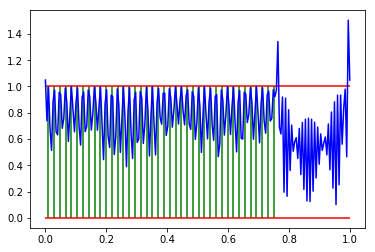

In [29]:
plt_util.plot_trig_poly_magnitude(interpolator_3)
plt_util.plot_support_magnitude_lines(support)
plt_util.plot_magnitude_bounds()

In [84]:
dual_certificates.validate(support, sign_pattern, interpolator_2)

{'bound_achieved': False,
 'max_deviation': 2.6726544054063215e-13,
 'status': False,
 'values_achieved': True}

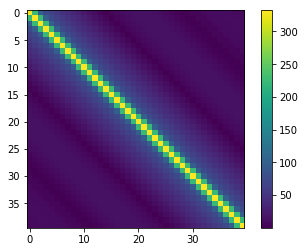

In [85]:
plt.imshow(np.absolute(kernel.derivative().inners_of_shifts(support)))
plt.colorbar()

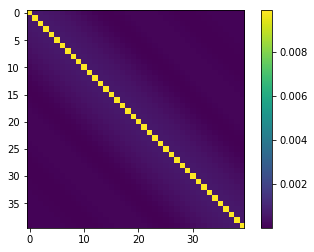

In [86]:
plt.imshow(np.absolute(kernel.inners_of_shifts(support)))
plt.colorbar()

# Phase Transition

In [72]:
reload(phase_transition)
reload(dual_certificates)
reload(test_data)

<module 'test_data' from 'test_data.pyc'>

In [73]:
fc = 50
m = 4
sizes = range(1, 41)
separation_ratios = np.linspace(0.05, 1.0, 40)
separations = separation_ratios / fc

In [83]:
%%time

probs = phase_transition.grid_probabilities(
    test_data.jittered_supports,
    lambda size: test_data.uniform_sign_pattern_multidim(size, m),
    trig_poly.TrigPoly.dirichlet(fc),
    dual_certificates.interpolate_multidim_with_derivative,
    sizes,
    separations,
    num_experiments=10,
    verbose=True)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
2 30
2 31
2 32
2 33
2 34
2 35
2 36
2 37
2 38
2 39
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
3 20
3 21
3 22
3 23
3 24
3 25
3 26
3 27
3 28
3 29
3 30
3 31
3 32
3 33
3 34
3 35
3 36
3 37
3 38
3 39
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
4 15
4 16
4 17
4 18
4 19
4 20
4 21
4 22
4 23
4 24
4 25
4 26
4 27
4 28
4 29
4 30
4 31
4 32
4 33
4 34
4 35
4 36
4 37
4 38
4 39
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11


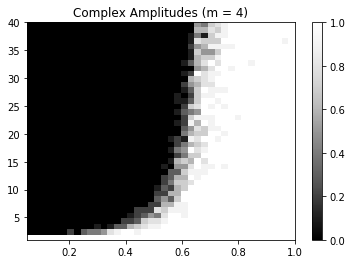

In [85]:
imshow_kwargs = {
    'cmap': 'Greys_r', 
    'extent': [separation_ratios[0], separation_ratios[-1], sizes[0], sizes[-1]], 
    'vmin': 0.0,
    'vmax': 1.0,
    'aspect': 'auto'}

plt.imshow(np.flip(probs, axis=0), **imshow_kwargs)
plt.colorbar()
plt.gca().set_title('Complex Amplitudes (m = 4)')

In [74]:
%%time

probs_10 = phase_transition.grid_probabilities(
    test_data.jittered_supports,
    lambda size: test_data.uniform_sign_pattern_multidim(size, 10),
    trig_poly.TrigPoly.dirichlet(fc),
    dual_certificates.interpolate_multidim_with_derivative,
    sizes,
    separations,
    num_experiments=10,
    verbose=True)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
2 30
2 31
2 32
2 33
2 34
2 35
2 36
2 37
2 38
2 39
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
3 20
3 21
3 22
3 23
3 24
3 25
3 26
3 27
3 28
3 29
3 30
3 31
3 32
3 33
3 34
3 35
3 36
3 37
3 38
3 39
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
4 15
4 16
4 17
4 18
4 19
4 20
4 21
4 22
4 23
4 24
4 25
4 26
4 27
4 28
4 29
4 30
4 31
4 32
4 33
4 34
4 35
4 36
4 37
4 38
4 39
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11


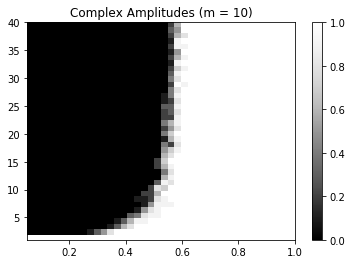

In [75]:
imshow_kwargs = {
    'cmap': 'Greys_r', 
    'extent': [separation_ratios[0], separation_ratios[-1], sizes[0], sizes[-1]], 
    'vmin': 0.0,
    'vmax': 1.0,
    'aspect': 'auto'}

plt.imshow(np.flip(probs_10, axis=0), **imshow_kwargs)
plt.colorbar()
plt.gca().set_title('Complex Amplitudes (m = 10)')

# Timing

In [5]:
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [16]:
reload(phase_transition)
reload(test_data)
reload(dual_certificates)

fc = 30
m = 4

sizes = np.array([5])
min_separations = np.array([0.5]) / float(fc)

# dual_certificates.interpolate_multidim_wDer
# trig_poly.TrigPoly.__add__

%lprun -f trig_poly.TrigPoly.eval phase_transition.grid_probabilities(test_data.jittered_supports,lambda size: test_data.uniform_sign_pattern_multidim(size, m),trig_poly.TrigPoly.dirichlet(fc),dual_certificates.interpolate_multidim_wDer,sizes,min_separations,num_experiments=10,verbose=True)

0 0
